In [1]:
import pandas as pd

In [2]:
from multiprocessing import Pool, cpu_count
import time
import numpy as np
import os
import sys
sys.path.append('../')
from statsmodels.distributions.empirical_distribution import ECDF
from matplotlib import pylab as plt
from IPython.display import *
import base64
import io
import seaborn.apionly as sns
%matplotlib inline

/Users/boris/anaconda3/lib/python3.6/site-packages/seaborn/apionly.py:6: UserWarning: As seaborn no longer sets a default style on import, the seaborn.apionly module is deprecated. It will be removed in a future version.
  warnings.warn(msg, UserWarning)


In [3]:
import statsmodels.nonparametric.kde as kde

In [4]:
from glob import glob
import pickle

In [5]:
files = glob('../data/interim/demographic_analysis/Phentermine cardio adr - cardio non valve and pulmonary/*.csv.zip')

In [6]:
len(files)

19

In [7]:
def plot_kde(kde, factor_to_emphasize=0.5,  figsize_factor=1.0):
    figsize = [3, 1]
    figsize = np.array(figsize) * figsize_factor
    x, y = kde
    if len(x) > 10:
        plt.ioff()
        fig, ax = plt.subplots(figsize=(figsize), dpi=120)
        ax.plot(x, y, '-k', lw=0.33)
        ax.fill_between(x, y, color='k', alpha=0.1)

        forward = np.cumsum(y)
        backward = 1 - forward
        factor_to_leave = 1 - factor_to_emphasize
        ix_from = np.abs(forward - factor_to_leave / 2).argmin()
        ix_to = np.abs(backward - factor_to_leave / 2).argmin()

        ax.fill_between(x[ix_from:ix_to], y[ix_from:ix_to], color='k', alpha=0.3)
        sns.despine(ax=ax, left=True, right=True, bottom=True)
        ax.set_xlim(min(x), 100)
        ax.set_xticks([])
        ax.set_yticks([])
        
        figfile = io.BytesIO()
        fig.savefig(figfile, format='png')
        figfile.seek(0)  # rewind to beginning of file
        figdata_png = figfile.getvalue()  # extract string (stream of bytes)
        figdata_png = base64.b64encode(figdata_png).decode('utf8')
        ret = f'<img src="data:image/png;base64,{figdata_png}">'
        plt.close(fig)
        plt.ion()
    else:
        ret = ''
    return ret

In [8]:
def group_rows(group):
    trows = []
    for sex in ['all', 'F', 'M']:
        curr_table = group.loc[group.sex == sex].set_index('variable')
        if sex == 'all':
            curr_label = curr_table.label.iloc[0]  # they are all the same
        else:
            curr_label = ''
        n = curr_table.n.iloc[0] # they are both the same
        age_median, age_mean, age_std = curr_table.loc['age'][['median', 'mean', 'std']]
        weight_median, weight_mean, weight_std = curr_table.loc['wt'][['median', 'mean', 'std']]

        fig_age_kde = plot_kde(curr_table.loc['age']['kde'], figsize_factor=0.5)
        fig_weight_kde = plot_kde(curr_table.loc['wt']['kde'], figsize_factor=0.5)
        trow = f"""
        <tr>
            <td>{curr_label}</td>
            <td>{sex}</td>
            <td>{n:,d}</td>
            <td>{age_median:.1f}</td>
            <td>{age_mean:.1f}</td>
            <td>{age_std:.1f}</td>
            <td>{fig_age_kde}</td>
            <td>{weight_median:.1f}</td>
            <td>{weight_mean:.1f}</td>
            <td>{weight_std:.1f}</td>
            <td>{fig_weight_kde}</td>
        </tr>
        """
        trows.append(trow)
    return trows

In [1]:
data.head()

NameError: name 'data' is not defined

In [ ]:
#def regression_data(df_demo):


In [10]:
df

,label,variable,sex,n,n_missing,n_valid,mean,median,std,kde
0,true_true,age,M,0,NaN,0,NaN,NaN,NaN,NaN
1,true_true,age,F,0,NaN,0,NaN,NaN,NaN,NaN
2,true_true,age,all,0,NaN,0,NaN,NaN,NaN,NaN
3,true_true,wt,M,0,NaN,0,NaN,NaN,NaN,NaN
4,true_true,wt,F,0,NaN,0,NaN,NaN,NaN,NaN
5,true_true,wt,all,0,NaN,0,NaN,NaN,NaN,NaN
6,true_false,age,M,0,NaN,0,NaN,NaN,NaN,NaN
7,true_false,age,F,0,NaN,0,NaN,NaN,NaN,NaN
8,true_false,age,all,0,NaN,0,NaN,NaN,NaN,NaN
9,true_false,wt,M,0,NaN,0,NaN,NaN,NaN,NaN


In [14]:
def eval_(k):
    try:
        return eval(k)
    except:
        return [[], []]

In [15]:
df = pd.read_csv('../data/interim/demographic_summary/Phentermine cardio adr - cardio total.csv')
df['kde'] = [eval_(k) for k in df['kde']]
gr = df.groupby('label')
rows = []
for _, group in gr:
    rows.extend(group_rows(group))
    rows.append('<tr></tr>')

In [16]:
table = """
<!DOCTYPE html>
<html>
<head>
<style>
table, th, td {
    border: 0px solid black;
}
</style>
</head>
<body>

<table>
  <caption>
    configuration name
  </caption>
  <tbody>
      
		<tr>
			<th></th>
			<th></th>
            <th></th>
			<th align="left" colspan="4">Age</th>
			<th align="left" colspan="4">Weight</th>
		</tr>
		<tr>
			<th></th>
			<th>Gender</th>
			<th>N</th>
			<th>median</th>
			<th>mean</th>
			<th>std</th>
			<th></th>
			<th>median</th>
			<th>mean</th>
			<th>std</th>
			<th></th>
		</tr>
		%%%TROWS%%%
		
	</tbody>
    
</table>
 
</body>
</html>
""".replace(
    "%%%TROWS%%%", '\n'.join(rows)
).replace(
    'configuration name',
    'Phentermine cardio adr - cardio non valve and pulmonary'
)
open('/Users/boris/temp/z.html', 'w').write(table)

45081

In [18]:
df

,label,variable,sex,n,n_missing,n_valid,mean,median,std,kde
0,true_true,age,M,0,NaN,0,NaN,NaN,NaN,"[[], []]"
1,true_true,age,F,0,NaN,0,NaN,NaN,NaN,"[[], []]"
2,true_true,age,all,0,NaN,0,NaN,NaN,NaN,"[[], []]"
3,true_true,wt,M,0,NaN,0,NaN,NaN,NaN,"[[], []]"
4,true_true,wt,F,0,NaN,0,NaN,NaN,NaN,"[[], []]"
5,true_true,wt,all,0,NaN,0,NaN,NaN,NaN,"[[], []]"
6,true_false,age,M,0,NaN,0,NaN,NaN,NaN,"[[], []]"
7,true_false,age,F,0,NaN,0,NaN,NaN,NaN,"[[], []]"
8,true_false,age,all,0,NaN,0,NaN,NaN,NaN,"[[], []]"
9,true_false,wt,M,0,NaN,0,NaN,NaN,NaN,"[[], []]"


In [17]:
n_all = len(df.age)
age = df.wt.dropna()
n = len(age)
age = age[(age > 0) & (age < 120)]
n_valid = len(age)
p = n / n_all
p_valid = n_valid / n
print(f'{p:.3f} {p_valid:.3f}')

AttributeError: 'DataFrame' object has no attribute 'age'

In [ ]:
bins = np.arange(0, 240.5, 1)

In [ ]:
counts = pd.value_counts(age, bins=bins).sort_index()

In [ ]:
counts.index.values

In [ ]:
plt.plot(
    [i.mid for i in counts.index],
    counts, 
    '-'
)

In [ ]:
counts = pd.value_counts(age.astype(int)).sort_index()

In [19]:
dir_demo_data = "../data/interim/demographic_analysis/belviq total cartiovascular reactions"
files = glob(os.path.join(dir_demo_data, '*.csv.zip'))
df_demo = pd.concat(
    [pd.read_csv(f) for f in files]
)

In [20]:
df_demo.tail(10)

,caseid,true_true,true_false,drug_naive_true,drug_naive_false,age,sex,wt,event_date
128,6805028,False,False,False,True,5742.0,M,67.00,2008-07-02
129,6807459,False,False,False,True,52.0,F,72.00,2008-10-09
130,6808288,False,False,False,True,49.0,F,149.00,2008-02-08
131,6808703,False,False,False,True,0.0,M,3.31,2008-09-15
132,6811905,False,False,False,True,46.0,F,NaN,2005-04-24
133,6813321,False,False,False,True,53.0,F,NaN,2003-12-15
134,6814324,False,False,False,True,50.0,F,92.00,2005-07-02
135,6815534,False,False,False,True,40.0,F,45.91,2007-06-11
136,6821483,False,False,False,True,27.0,F,NaN,2008-11-12
137,6822753,False,False,False,True,68.0,M,116.00,2007-07-02


In [21]:
from statsmodels.nonparametric.kde import KDEUnivariate
KDEUnivariate.k

AttributeError: type object 'KDEUnivariate' has no attribute 'k'

In [22]:
def summarize_config(config, dir_out):
    dir_demo_data = config.get_xxx()
    files = glob(os.path.join(dir_demo_data, '*.csv.zip'))
    df_demo = pd.concat(
        [pd.read_csv(f) for f in files]
    )
    rows = []
    for label in ['true_true', 'true_false', 'drug_naive_true', 'drug_naive_false']:
        for variable in ['age', 'wt']:
            for sex in ['M', 'F', None]:
                sel = df_demo[label] 
                if sex is not None:
                    sel = sel & (df_demo['sex'] == sex)
                values = df_demo.loc[sel][variable]
                n = len(values)
                values = values.dropna()
                n_valid = len(values)
                mean_ = np.mean(values)
                std_ = np.std(values, ddof=1)
                median_ = np.median(values)

                kde = KDEUnivariate(values)
                kde.fit()
                mn = 0
                mx = 120 if variable == 'age' else 240
                x = np.arange(mn, mx)
                kde_values = kde.evaluate(x)
                row = {
                    'label': label,
                    'variable': variable,
                    'sex': sex if sex else 'all',
                    'n': n,
                    'n_valid': n_valid,
                    'mean': mean_,
                    'median': median_,
                    'std': std_,
                    'kde': (x.tolist(), y.tolist())
                }
                rows.append(row)
    processed = pd.DataFrame(rows)
    fn_out = config.get_xxxx()
    processed.to_csv(fn_out, index=False)

In [23]:
pd.DataFrame(rows).to_csv('/Users/boris/temp/z.csv')

In [24]:
z = pd.read_csv('/Users/boris/temp/z.csv')

In [25]:
zz = eval(z.kde.iloc[0])
type(zz)

AttributeError: 'DataFrame' object has no attribute 'kde'

In [26]:
std_ = np.std

In [27]:
age = df_demo.wt.dropna()

In [28]:
e1 = ECDF(age)
x = np.arange(0, 120)
y = e1(x)


In [29]:
kde = KDEUnivariate(np.round(age, 1))
kde.fit()
pdf = kde.evaluate(x)

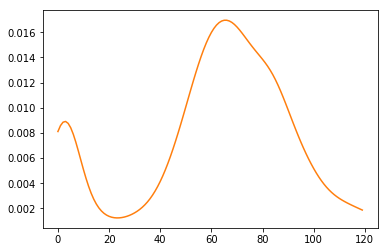

In [30]:
plt.plot(x, pdf, '-', color='C1')

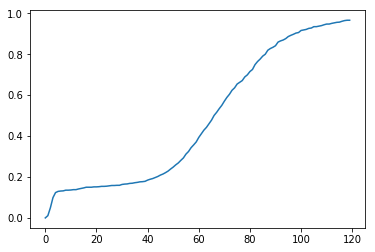

In [31]:
plt.plot(x, y, '-')

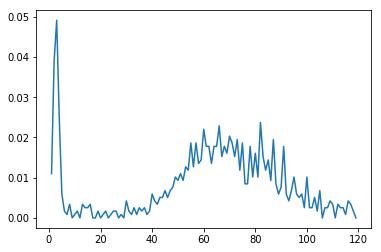

In [32]:
plt.plot(x[1:], np.diff(y), '-')

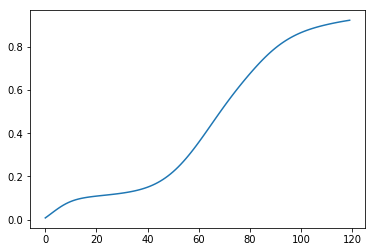

In [33]:
cdf = pdf.cumsum()
plt.plot(cdf)

In [34]:
fn_marked = '../data/interim/marked_data/2017q1.csv'
fn_demo = '../data/external/faers/demo2017q1.csv.zip'
fn_config = '../config/belviq total cartiovascular reactions.json'

In [ ]:
def get_relevant_cases(fn_marked, config, nrows=None):
    df_marked = pd.read_csv(
        fn_marked,
        nrows=nrows
    )
    columns_bookkeeping = ['caseid', 'q']
    columns_info = [c for c in df_marked if c.startswith('drug ') or c.startswith('reaction ')]
    dtypes = {c: str for c in columns_bookkeeping}
    for c in columns_info:
        dtypes[c] = bool
    df_marked = pd.read_csv(
        fn_marked,
        usecols=columns_bookkeeping + columns_info,
        dtype=dtypes,
        nrows=10000
    )
    
    columns_drugs = [f'drug {d}' for d in config.drugs]
    columns_reactions = [f'reaction {r}' for r in config.reactions]
    drug_true = df_marked[columns_drugs].any(axis=1)
    reaction_true = df_marked[columns_reactions].any(axis=1)
    drug_naive = ~df_marked[columns_drugs].any(axis=1)
    ret = df_marked[columns_bookkeeping].copy()
    ret['true_true'] = (drug_true & reaction_true).values
    ret['true_false'] = (drug_true & (~reaction_true)).values
    ret['drug_naive_true'] = (drug_naive & reaction_true).values
    ret['drug_naive_false'] = (drug_naive & (~reaction_true)).values
    return ret.loc[
        ret.true_true | ret.true_false | ret.drug_naive_true | ret.drug_naive_false
    ]

In [ ]:
def read_demo_data(fn_demo):
    dtypes = {
        'caseid': str, 
        'event_dt_num': str,
        'age': float,
        'age_cod': str,
        'sex': str,
        'wt': float,
        'wt_cod': str
    }
    df_demo = pd.read_csv(
        fn_demo,
        dtype=dtypes,
        usecols=dtypes.keys()
    )

    to_year_conversion_factor = {
        'YR': 1.0,
        'DY': 365.25,
        'MON': 12,
        'DEC': 0.1,
        'WK': 52.2,
        'HR': 24 * 365.25
    }
    to_year_conversion_factor = pd.Series(to_year_conversion_factor)

    to_kg_conversion_factor = {
        'KG': 1.0,
        'LBS': 2.20462
    }
    to_kg_conversion_factor = pd.Series(to_kg_conversion_factor)
    df_demo.wt = df_demo.wt / to_kg_conversion_factor.reindex(df_demo.wt_cod.values).values
    df_demo.age = df_demo.age / to_year_conversion_factor.reindex(df_demo.age_cod.values).values
    df_demo['event_date'] = pd.to_datetime(df_demo.event_dt_num, dayfirst=False)
    df_demo.drop(['age_cod', 'wt_cod', 'event_dt_num'], axis=1, inplace=True)
    return df_demo

In [ ]:

df_cases = get_relevant_cases(fn_marked, config, 1000)
df_cases.tail()

In [ ]:
df_demo = read_demo_data(fn_demo)

In [ ]:
df_demo.head()

In [ ]:
mrgd = df_cases.merge(
    df_demo,
    on='caseid',
    how='left'
)

In [ ]:
mrgd.to_csv('/Users/boris/temp/z.csv.zip', compression='zip', index=False)

In [ ]:
pd.to_datetime(pd.read_csv('/Users/boris/temp/z.csv.zip').event_date)